### **TEMG 4940C - Machine Learning Assignment Guideline**

---



This document provides a guideline for completing a machine learning assignment. The assignment consists of 6 part, each corresponding to each steps with reference to Tutorial’s PPT:

*Remarks: There are no restrictions in terms of what specific libraries or programming language to use, so feel free to be creative or search online for inspirations.*


---




#### **Submission Criteria**
Your submission should include the following:
1. A public git repository with your machine learning code and a brief README file describing how to run it.
   
   a. README file should include the version of python & common libraries used during the development
   
   b. You are **STRONGLY RECOMMENDED** to comment your code, both for readability & to develop good collaboration habits in dev
   
   
2. A link to your deployed dashboard (if hosted)

---



**Name**:

**Student ID**:

#### **Dataset Introduction**
Customer personality analysis is a thorough examination of a company's ideal clients. It makes it simpler for businesses to adapt products in response to the unique wants, habits, and concerns of various consumer types.

Consumer personality analysis aids a corporation in tailoring its offering to its target market from various consumer categories. For instance, a firm can assess which customer segment is most likely to purchase the product and then promote the product exclusively to that specific segment rather than investing money to market a new product to every consumer in the database of the company.


---

**Attributes:**

*Part 1. People*
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


*Part 2. Products*
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


*Part 3.Promotion*
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


*Part 4. Place*
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

-------
**Ultimate Goal:**

With the Datasets aforementioned, evaluated the likelihood that customer would accepted offers in Marketing Campaign

**[Prediction Value]: Y =AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response**

#### **Step 0. Loading the Data from File Path**
- Download the dataset from Canvas
- Undergo Preliminary Analysis



In [1]:
#Importing Relevant Libraries
import numpy as np
import pandas as pd

In [2]:
#Loading the Dataset
data = pd.read_csv("dataset.csv", sep="\t")
print("Number of datapoints:", len(data)) # Show number of Data Rows in Dataset
data.head(10) # Print Top 10 Rows of the dataset for preview

Number of datapoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
#Information on features
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000




---



> Q0. Generate Y - Predictor Value

In [4]:
#@title Q0. Generate Y - Predictor Value
## Before Proceeding, You may want to evaluate the Y -Predictor Value first
## By combining Y = AcceptedCmp1 + cceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response
Y = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]
print(Y)


0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Length: 2240, dtype: int64


#### **Step 1. Exploratory Data Analysis**
In this step, you shall explore the data set and perform some descriptive statistics and visualizations to understand the data better. You shall also identify any potential problems or issues with the data, such as missing values, outliers, or imbalances.




> Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.

In [5]:
#@title Q1a. In whichever preferred means (tables, graphs etcs), showcase the existence of missing value, outliers & imbalances in the dataset.
import plotly.express as px
from plotly.subplots import make_subplots
from scipy import stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# Q1a. Showcase existence of missing value, outliers & imbalances within dataset

#Missing Values

#Find how many missing values in each column:
data.info() #From the table you can see the non-null count in Income column is 2216 and 2240 non-null count for the rest of the columns
missingValuesCol = data.isna().sum()
#print(missingValuesCol)
#From this we can see that there is 24 outliers in the Income column
missingValuesTotal = data.isna().sum().sum()
#print(missingValuesTotal) #Output is 24, meaning all null data is in Income column




fig = make_subplots(rows=2, cols=3)


#All columns that have outliers:
fig1 = px.box(data, y = "Year_Birth")
fig2 = px.box(data, y = "Income")
fig3 = px.histogram(data, x = "Kidhome")
fig4 = px.box(data, y = "MntWines")
fig5 = px.box(data, y = "MntMeatProducts")
fig6 = px.box(data, y = "MntFishProducts")
fig7 = px.box(data, y = "MntSweetProducts")
fig8 = px.box(data, y = "MntGoldProds")
fig9 = px.box(data, y = "NumDealsPurchases")
fig10 = px.box(data, y = "NumWebPurchases")
fig11 = px.box(data, y = "NumCatalogPurchases")
fig12 = px.box(data, y = "NumStorePurchases") #No Outliers
fig13 = px.box(data, y = "NumWebVisitsMonth")
fig14 = px.histogram(data, x = "AcceptedCmp1") #No Outliers
fig15 = px.histogram(data, x = "AcceptedCmp2")#No Outliers
fig16 = px.histogram(data, x = "AcceptedCmp3")#No Outliers
fig17 = px.histogram(data, x = "AcceptedCmp4")#No Outliers
fig18 = px.histogram(data, x = "AcceptedCmp5")#No Outliers


#fig8.show()

#plt.figure()
#data.boxplot()
#plt.show()





#I want to remove all rows if they have at least one outlier in a columnß





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

>  Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Length: 2216, dtype: int64


<Axes: >

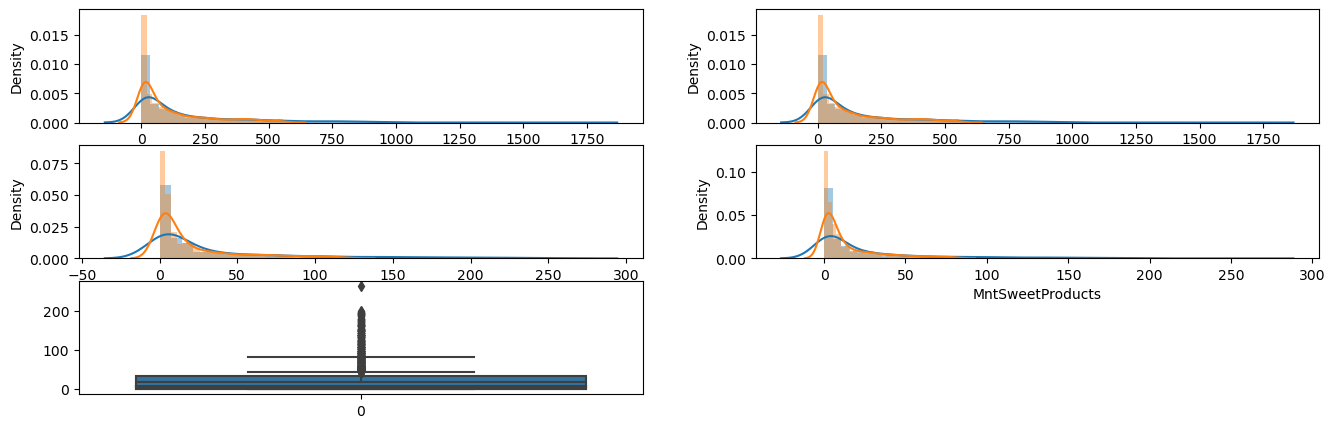

In [6]:
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#@title Q1b. Handle the missing values and outliers, and explain why was that particular methodology chosen.
# Q1b. Codes to handle (i) Missing Values, (ii) Outliers
# Tips: You may refer to Slide 19 in Tutorial PPT


# Q1bi
#For the missing values I have decided to remove all data records with missing values as there is only 24 missing values in a total of 2240 records
#Meaning only 1% records need to be removed from the data set
data = data.dropna()
Y = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data["Response"]
print(Y)
#data.describe() #Now contains 2216/2240 values

# Q1bii




warnings.filterwarnings("ignore")
plt.figure(figsize=(16,5))
plt.subplot(3,2,1)
sns.distplot(data["MntMeatProducts"])

plt.subplot(3,2,2)
sns.distplot(data["MntMeatProducts"])
plt.subplot(3,2,3)
sns.distplot(data["MntFishProducts"])
plt.subplot(3,2,4)
sns.distplot(data["MntSweetProducts"])
plt.subplot(3,2,5)
sns.boxplot(data["MntSweetProducts"])


def remove_outliers_and_fill_with_median(data):
    # Calculate the median for each row
    row_median = data.median(axis=1)

    # Loop through each column
    for col in data.columns:
        # Only process columns of type int64 or float64
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            # Calculate the lower and upper bounds for outliers using the interquartile range (IQR)
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5*iqr
            upper_bound = q3 + 1.5*iqr

            # Replace outliers with row median
            data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), row_median, data[col])

    return data

data = remove_outliers_and_fill_with_median(data)

plt.subplot(3,2,1)
sns.distplot(data["MntMeatProducts"])

plt.subplot(3,2,2)
sns.distplot(data["MntMeatProducts"])
plt.subplot(3,2,3)
sns.distplot(data["MntFishProducts"])
plt.subplot(3,2,4)
sns.distplot(data["MntSweetProducts"])
plt.subplot(3,2,5)
sns.boxplot(data["MntSweetProducts"])
    



> Q1c. Explain why the above methodology to handle the missing values and outliers is chosen

**Answer:**

| | Methodology Used | Underlying Rationale |
|--|--|--|
|Handling Outliers | Quartile Bound | The density of data is very high around the center of the distribution for most columns and hence using feature cap would remove too much data and hence Quartile bound is a better way to remove outliers as majority of data is still kept  |
|Handling Missing Values| Ignore Data | Only 1.07% records need to be removed from the data set |


>  Q1d. Plot 3 or more types of charts over all columns of data

Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


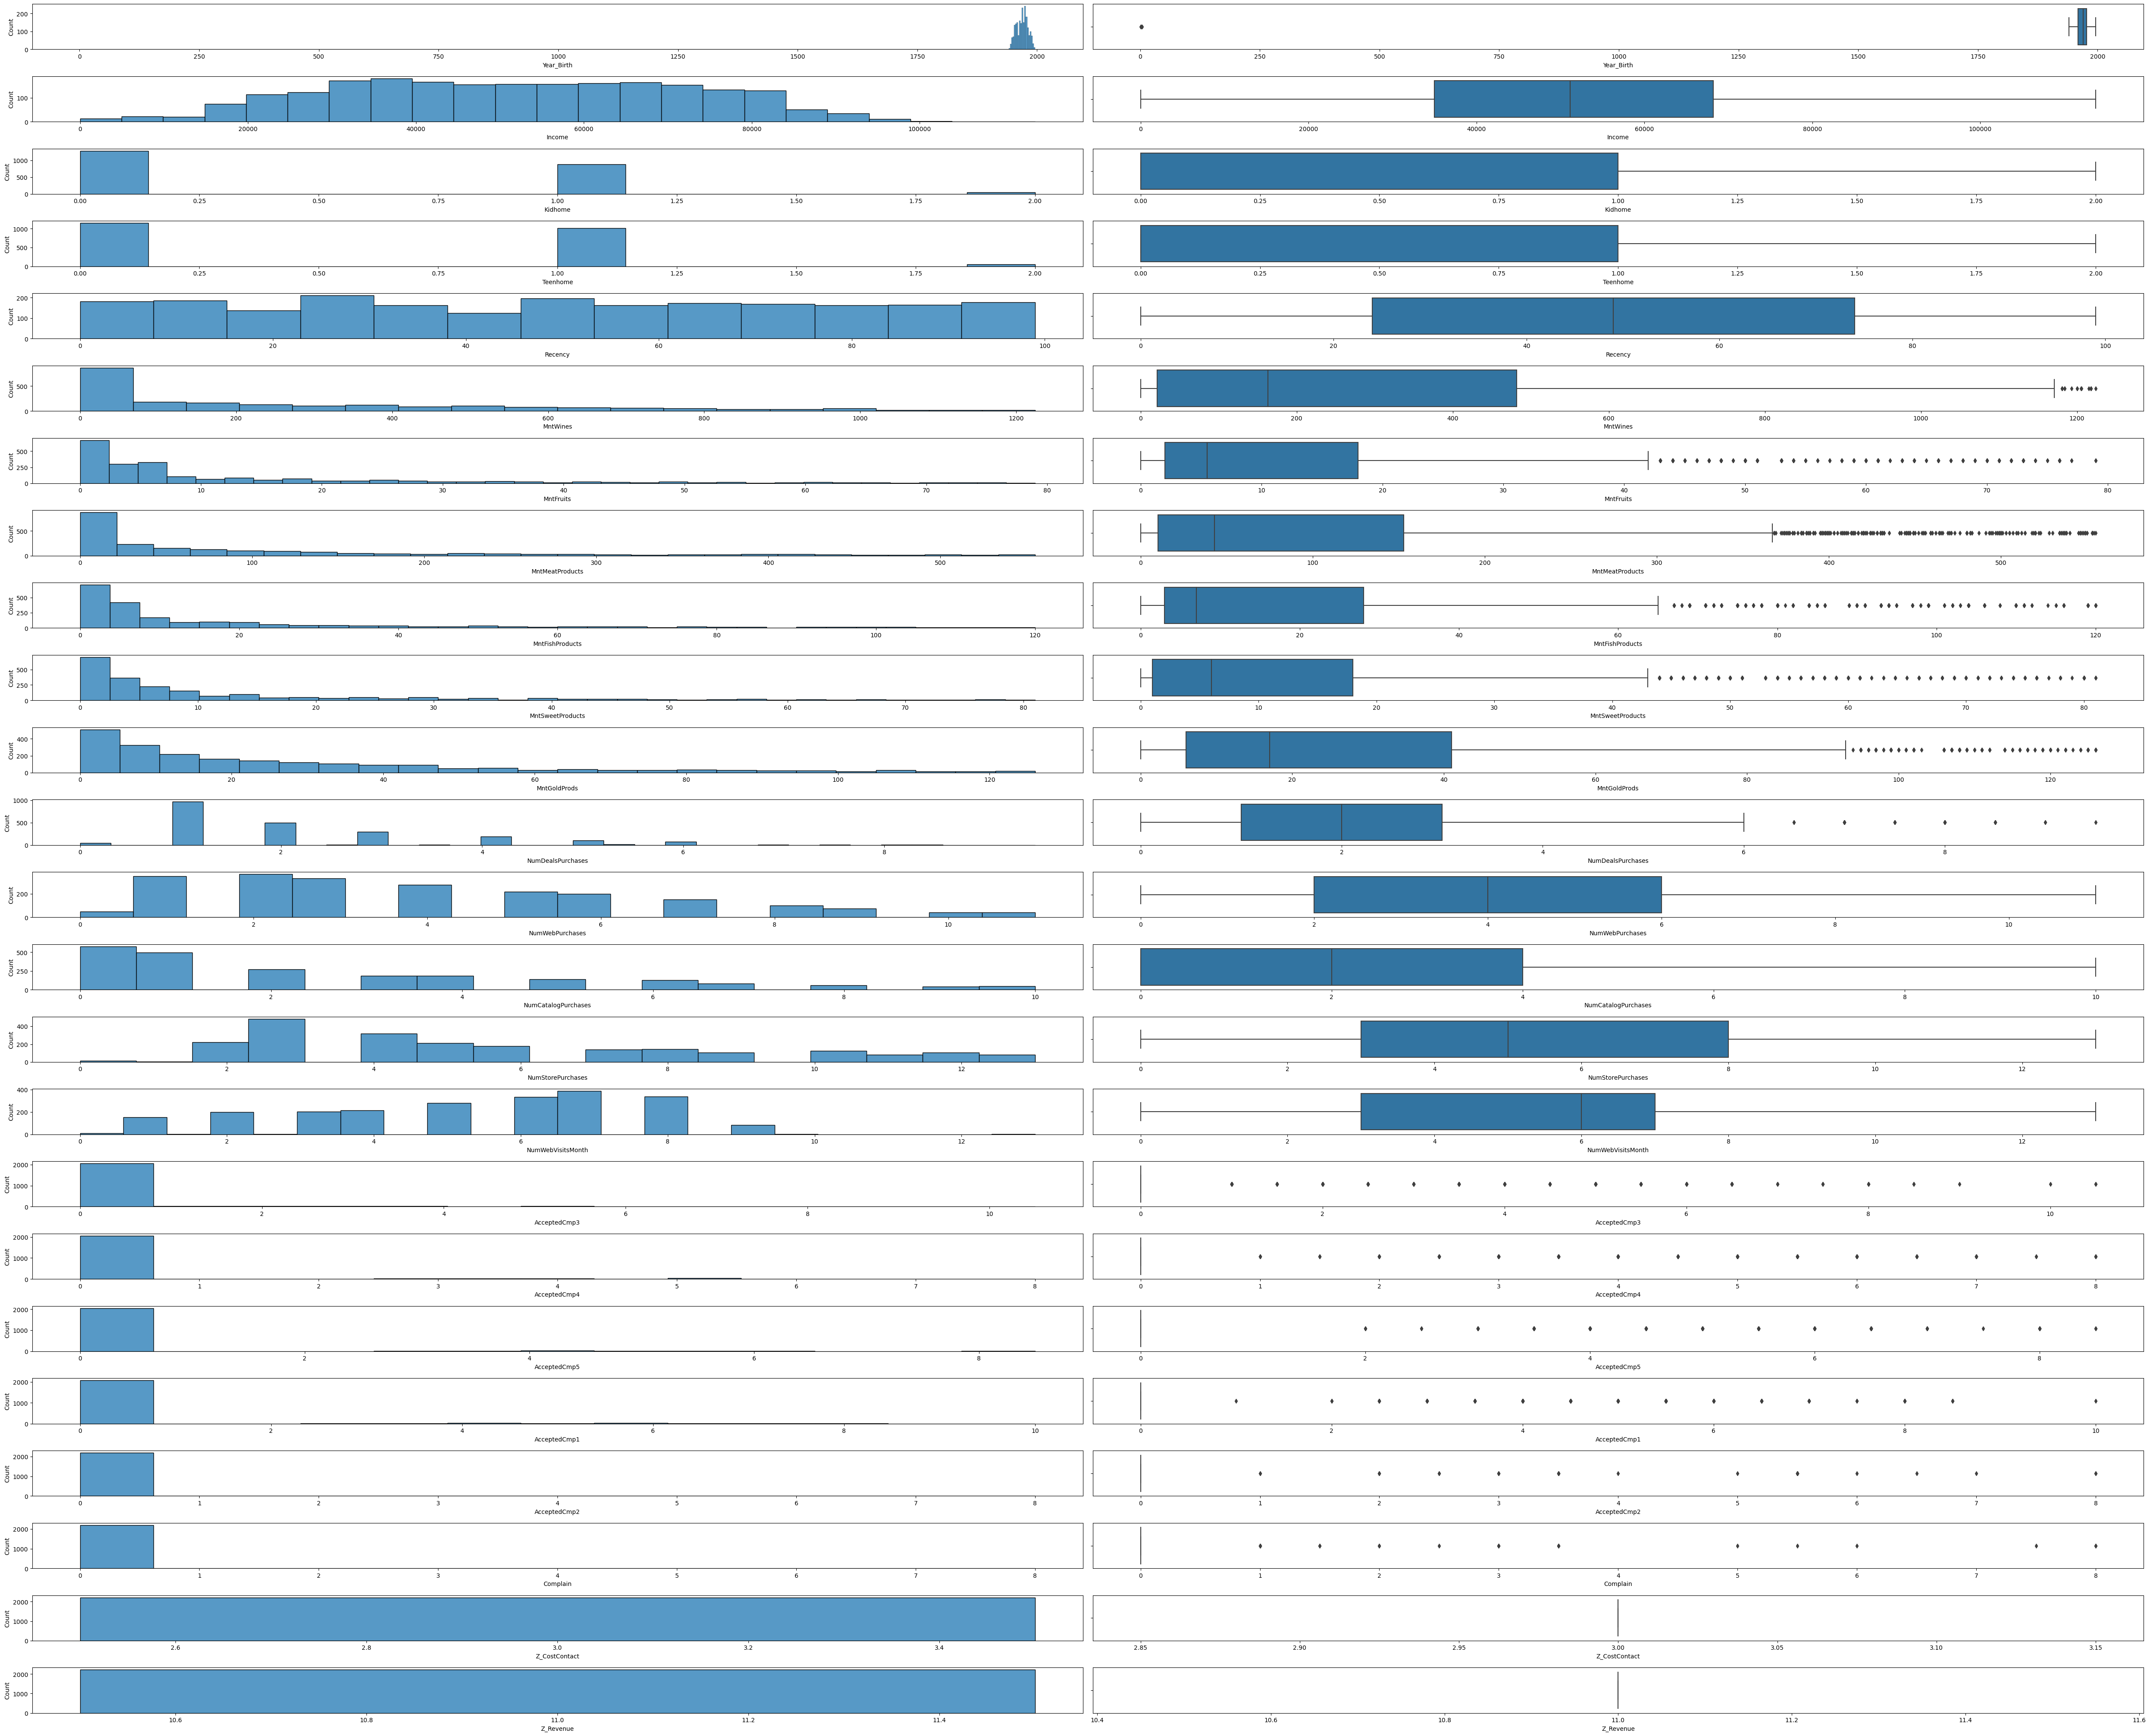

Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [7]:
#@title Q1d. Plot 3 or more types of charts over all columns of data
# Q1d. Exploratory Data Analysis Graph Plotting

# import xxx as xxx (Import Graphing Libraries)
# ....
# plt.show()

import plotly.express as px
from plotly.subplots import make_subplots
print("Column names:", data.columns)
#data.info()

#new_df.describe()

plt.figure(figsize=(50,50), layout = "tight")
figCounter = 1

for col in range(1,28):
    # Check if the column is of type int64 or float64
    if data.iloc[:,col].dtype == 'int64' or data.iloc[:,col].dtype == 'float64':
        plt.subplot(30,2,figCounter)
        sns.histplot(x = data.iloc[:,col])
        plt.subplot(30,2,figCounter+1)
        sns.boxplot(x = data.iloc[:,col])
        figCounter +=2




plt.show()
print("Column names:", data.columns)


> Q1e. Describe 3 observed patterns/ anomalies, and explain how would you plan/change your approach in upcoming data preparation/modeling based on the observations

**Answer:**

| | Pattern/Anomalies Observed | Respective Insights based on Observation |
|--|--|--|
| Pattern 1 | (Fill in the blank) | (Fill in the blank) |
| Pattern 2 | (Fill in the blank) | (Fill in the blank) |
| Pattern 3 | (Fill in the blank) | (Fill in the blank) |




--------



#### **Step 2. Data Preparation**
In this step, you will prepare the data for modeling by applying appropriate techniques such as data cleaning, feature engineering, feature selection, and data transformation. You will also split the data into training and testing sets.

> Q2a. Identify Data Type of Each Column & Respective Data Preprocessing Methods
- **Type:** Nominal | Ordinal | Discrete | Continuous
- **Data Preprocessing Method:** One Hot Encoding | Rank Replacement | Normalization | Missing Data | Outlier | Feature Engineer | Data Balancing

**Answer:**

| Column | Data Type | Data Preprocessing |
|--|--|--|
ID                 | Nominal | One Hot Encoding |
Year_Birth         | Discrete | Normalization |      
Education          | Ordinal | Rank Replacement |       
Marital_Status     | Nominal | One Hot Encoding |
Income             | Continuous | Normalization |      
Kidhome            | Discrete   | Normalization |        
Teenhome           | Discrete   | Normalization |   
Dt_Customer        | Nominal | None |      
Recency            | Discrete | Normalization) |     
MntWines           | Continuous | None |    
MntFruits          | Continuous | None |    
MntMeatProducts    | Continuous | None |     
MntFishProducts    | Continuous | None |    
MntSweetProducts   | Continuous | None |    
MntGoldProds       | Continuous | None |
NumDealsPurchases  | Discrete | None |  
NumWebPurchases    | Discrete | None |
NumCatalogPurchases| Discrete | None |
NumStorePurchases  | Discrete | None |  
NumWebVisitsMonth  | Discrete | None |  
AcceptedCmp3       | Nominal | None |  
AcceptedCmp4       | Nominal | None |       
AcceptedCmp5       | Nominal | None |       
AcceptedCmp1       | Nominal | None |       
AcceptedCmp2       | Nominal | None |       
Complain           | Nominal | None |       
Z_CostContact      | int64) | (Fill in the blank) |     
Z_Revenue          | int64 | (Fill in the blank) |          
Response           | Nominal | One Hot Encoding |


>  Q2b. Perform the aforementioned Data Preprocessings

In [8]:
# @title Q2b. Perform the aforementioned Data Preprocessings
# Q2b. Preform Data Preprocessing

# import xxx as xxx (Import panda Libraries)
# from sklearn.preprocessing import xxx (Import sklearn libraries)

# ....
#
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

print(data.info())

# Load the data

# Define the mapping for the Education column

data = data.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)


# Normalize the Year_Birth, Income, Kidhome, Teenhome, and Recency columns
scaler = MinMaxScaler()
data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']] = scaler.fit_transform(data[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency']])


print(data["Education"].unique())
education_mapping = {
    'Basic': 0,
    'Graduation': 1,
    '2n Cycle': 2,
    'Master': 3,
    'PhD': 4
}
data['Education'] = data['Education'].map(education_mapping)

data = pd.get_dummies(data, columns=['Marital_Status'])


#data['Response'] = np.where(data['Response'] >= 0.5, 1, 0)
#X = data.drop('Response', axis=1)
X = data
y = Y


# Handling missing values

X = X.dropna()
Y = Y.dropna()


print(data.info())








<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   float64
 1   Year_Birth           2216 non-null   float64
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   float64
 6   Teenhome             2216 non-null   float64
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   float64
 9   MntWines             2216 non-null   float64
 10  MntFruits            2216 non-null   float64
 11  MntMeatProducts      2216 non-null   float64
 12  MntFishProducts      2216 non-null   float64
 13  MntSweetProducts     2216 non-null   float64
 14  MntGoldProds         2216 non-null   float64
 15  NumDealsPurchases    2216 non-null   f



---



#### **Step 3. Modeling**
In this step, you will choose and apply one or more machine learning algorithms to build predictive models using the training data.

>  Q3a. Generate Test/Training Data Split

In [9]:
#@title Q3a. Generate Test/Training Data Split
# Q3a. Generate Test / Training Data Split


from sklearn.model_selection import train_test_split
#Pareto Principle Split 80/20
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#print(data.info())

print(type(y_train))

#data.info()

<class 'pandas.core.series.Series'>


> Q3b. Choose and deploy dataset to 3+ ML Model

In [10]:
#@title Q3b. Choose and deploy dataset to 3+ ML Model
# Q3b. Choose 3 models to deploy dataset to
# Tips: Do not afraid to test out various models, to find out which model fits the datasets the best

# Step 1. Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Step 2. Fit Dataframe into Model



# Step 3. Generate Model Prediction (Y)

# Train and evaluate a logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
print(f"Logistic Regression model accuracy: {lr_score}")

# Train and evaluate a decision tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_score = dt_model.score(X_test, y_test)
print(f"Decision Tree model accuracy: {dt_score}")

# Train and evaluate a random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print(f"Random Forest model accuracy: {rf_score}")



# Multinomial logistic regression





# Train and evaluate a decision tree classifier



Logistic Regression model accuracy: 0.7364864864864865
Decision Tree model accuracy: 0.9842342342342343
Random Forest model accuracy: 0.9594594594594594




---



#### **Step 4. Evaluation**
In this step, you will evaluate the performance of the models using various metrics and techniques, such as accuracy, precision, recall, F1-score, confusion matrix, ROC curve, etc. You will also compare the results of different models and select the best one.


> Q4a. Evaluate the models accuracy by calculating / plotting the following
1. Confusion Matrix
2. Accuracy Score, Recall Score, Precision Score, AUC Score & F1 Score
3. Plot the ROC Curve

> Q4b. After Evaluation, Please indicate which model would you eventually pursue & the underlying rationale

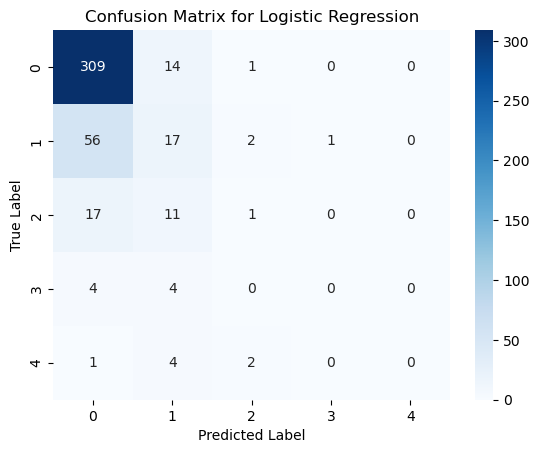

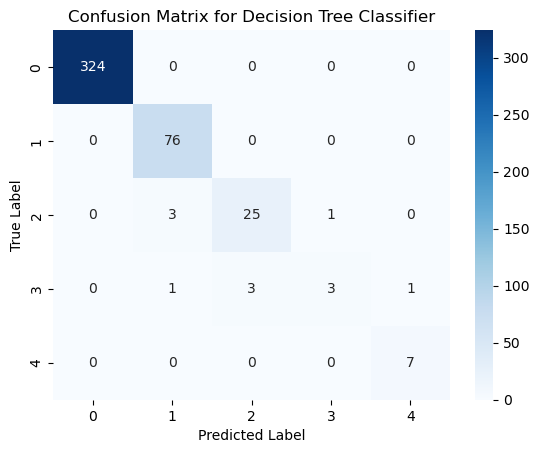

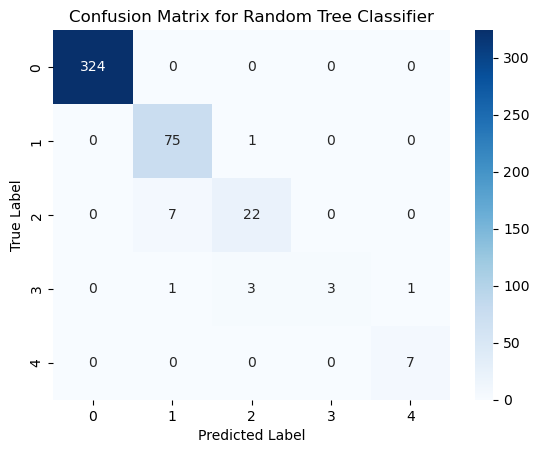

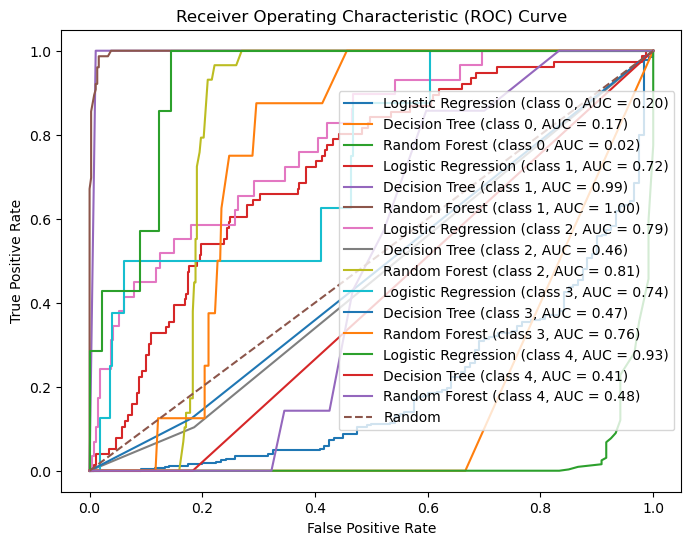

In [11]:
#@title Q4a. Evaluate the Model's Accuracy
# from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score ...
# print(xxxx)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc, f1_score
from sklearn.multiclass import OneVsRestClassifier

import seaborn as sns

# create a confusion matrix for the model




# create each model
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# fit each model on the training data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# make predictions on the test data for each model
lr_y_pred = lr_model.predict(X_test)
lr_y_prob = lr_model.predict_proba(X_test)[:, 1]

dt_y_pred = dt_model.predict(X_test)
dt_y_prob = dt_model.predict_proba(X_test)[:, 1]

rf_y_pred = rf_model.predict(X_test)
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]


""""
# evaluate each model using the metrics defined above
models = [(lr_y_pred, lr_y_prob, 'Logistic Regression'), 
          (dt_y_pred, dt_y_prob, 'Decision Tree'), 
          (rf_y_pred, rf_y_prob, 'Random Forest')]

for y_pred, y_prob, model_name in models:
    print(model_name)
    cm = confusion_matrix(y_test, y_pred)

    # plot the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # calculate the recall score
    recall = recall_score(y_test, y_pred, average=None)
    avg_recall = np.mean(recall)
    print(f"Average Recall: {avg_recall:.2f}")


    # calculate the precision score
    precision = precision_score(y_test, y_pred, average=None)
    avg_precision = np.mean(precision)
    print(f"Precision: {avg_precision:.2f}")

    # calculate the AUC score



    # create a separate binary classifier for each class
    classifiers = [OneVsRestClassifier(RandomForestClassifier(random_state=42)).fit(X_train, y_train[:, i]) for i in range(5)]

    # make predictions for each binary classifier
    y_prob = np.hstack([classifier.predict_proba(X_test)[:, 1].reshape(-1, 1) for classifier in classifiers])
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    avg_auc_score = np.mean(auc_score)
    print(f"AUC: {avg_auc_score:.2f}")

    # calculate the F1 score
    f1 = f1_score(y_test, y_pred, average=None)
    avg_f1 = np.mean(f1)
    print(f"F1 Score: {avg_f1:.2f}")

    # plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {y_prob:.2f})")

# plot the ROC curve for all models
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
"""
# Calculate the evaluation metrics for the logistic regression model
lr_cm = confusion_matrix(y_test, lr_y_pred)

sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')

# Calculate the evaluation metrics for the decision tree model
dt_cm = confusion_matrix(y_test, dt_y_pred)

sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred, average='weighted')
dt_precision = precision_score(y_test, dt_y_pred, average='weighted')
dt_f1 = f1_score(y_test, dt_y_pred, average='weighted')

# Calculate the evaluation metrics for the random forest model
rf_cm = confusion_matrix(y_test, rf_y_pred)

sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Tree Classifier')
plt.show()

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Compute the ROC curves and AUC scores for each class
n_classes = len(np.unique(y_test))
lr_fpr = dict()
lr_tpr = dict()
lr_auc = dict()
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for i in range(n_classes):
    lr_fpr[i], lr_tpr[i], _ = roc_curve(y_test == i, lr_y_prob)
    lr_auc[i] = auc(lr_fpr[i], lr_tpr[i])
    dt_fpr[i], dt_tpr[i], _ = roc_curve(y_test == i, dt_y_prob)
    dt_auc[i] = auc(dt_fpr[i], dt_tpr[i])
    rf_fpr[i], rf_tpr[i], _ = roc_curve(y_test == i, rf_y_prob)
    rf_auc[i] = auc(rf_fpr[i], rf_tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(lr_fpr[i], lr_tpr[i], label=f"Logistic Regression (class {i}, AUC = {lr_auc[i]:.2f})")
    plt.plot(dt_fpr[i], dt_tpr[i], label=f"Decision Tree (class {i}, AUC = {dt_auc[i]:.2f})")
    plt.plot(rf_fpr[i], rf_tpr[i], label=f"Random Forest (class {i}, AUC = {rf_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Answer:**

I choose Model Random Forest because the AUC is the highest.



---



#### **Step 5. Optimization**
In this step, you will try to improve the performance of the best model by applying some advanced techniques such as hyperparameter tuning, K-fold Cross Validation, ensemble methods, etc.

>  Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score

In [12]:
#@title Q5a. Attempt Manual Hyperparameter Tuning & Observe how it affects the accuracy score
from sklearn.model_selection import GridSearchCV
# Step 1. Head to the library that you sourced your pre-trained models from, and look at what hyperparameters are available for tuning

# Step 2. Try and Test out various combinations to observe the minor differences hyper-parameter tuning makes

# define the hyperparameters to tune



# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score
# create a random forest model

# define a range of values for the hyperparameters to be tuned
n_estimators = [10, 50, 100, 200, 500]
max_depth = [None, 5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# try different combinations of hyperparameters and evaluate the model
best_score = 0
best_params = {}
for n in n_estimators:
    for d in max_depth:
        for ms in min_samples_split:
            for ml in min_samples_leaf:
                # set the hyperparameters
                rf_model.set_params(n_estimators=n, max_depth=d, 
                                    min_samples_split=ms, min_samples_leaf=ml)

                # fit the model and evaluate on the validation set
                rf_model.fit(X_train, y_train)
                score = rf_model.score(X_test, y_test)

                # keep track of the best hyperparameters
                if score > best_score:
                    best_score = score
                    best_params = {'n_estimators': n, 'max_depth': d, 
                                   'min_samples_split': ms, 'min_samples_leaf': ml}

# train the model with the best hyperparameters on the full training set
rf_model.set_params(**best_params)
rf_model.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Params:  {best_params}")
print(f"Accuracy: {accuracy:.2f}")


Best Params:  {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Accuracy: 0.98


>  Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

In [13]:
#@title Q5b. Attempt K-fold Cross Validation to find the best Hyperparameter & Observe how it affects the accuracy score

# Step 1. Import K-fold Cross Validation Libraries
# from sklearn.model_selection import cross_val_score

# Step 2. Generate Cross-validation grid containing various combination of hyper-parameter (Tips: Check Slide 48 in Tutorial PPT)

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.model_selection import GridSearchCV, KFold

# create a random forest model

# define a range of values for the hyperparameters to be tuned
param_grid = {'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [None, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# perform grid search with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# print the best hyperparameters and cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Cross-Validation Score:", grid_search.best_score_)

# train the model with the best hyperparameters on the full training set
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Cross-Validation Score: 0.9582557491843717
Accuracy: 0.97


>  Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

In [14]:
#@title Q5c. Attempt one of the 3 ensemble methods & Observe how it affects the accuracy score

# Step 1. Import Relevant functions from Libraries
# e.g. from sklearn.ensemble import BaggingClassifier

# Step 2. Add ensembling methods on top of Base models

# Step 3. Re-use the code in Part 4, to observe the changes in accuracy score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# create a decision tree base estimator


# create a Random Forest model
rf_model = RandomForestClassifier(max_depth =  None, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)

# train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# evaluate the Random Forest model on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# create a decision tree base estimator
base_estimator = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# create a bagging model with the decision tree base estimator
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10)

# train the bagging model on the training set
bagging_model.fit(X_train, y_train)

# evaluate the bagging model on the test set
y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97
Accuracy: 0.96




---



#### **Step 6. Interpretation**
In this step, you will interpret the results of the best model and explain its predictions using some methods such as SHAP values, LIME, etc. You will also discuss the limitations and implications of the model and provide some recommendations for future work.

> Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

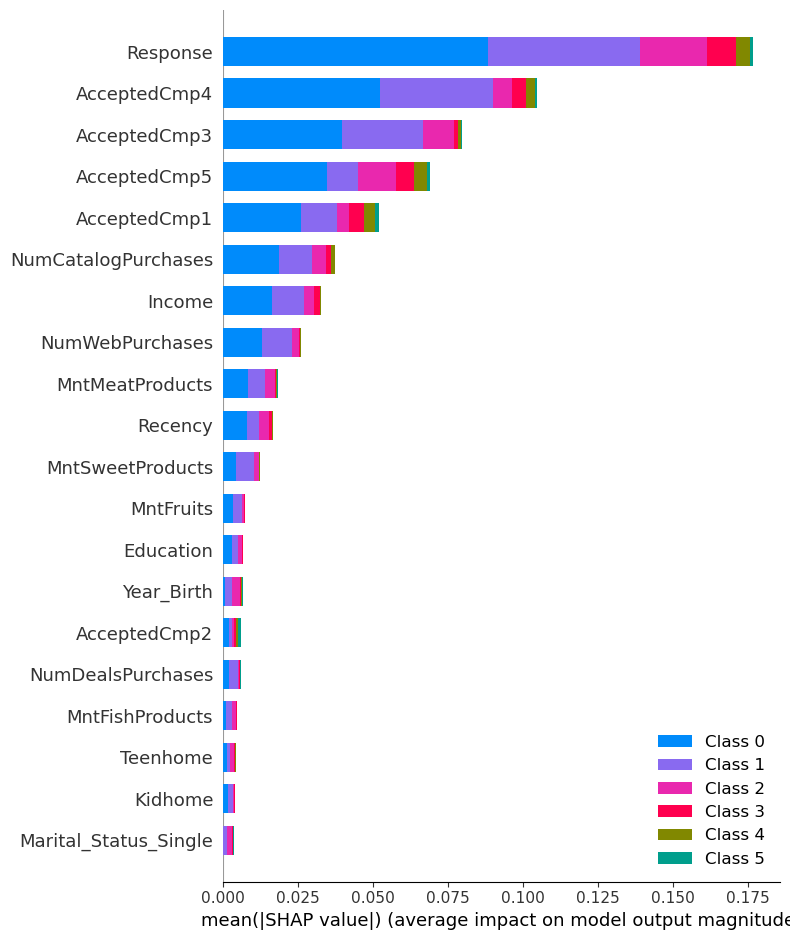

In [15]:
#@title Q6. Plot 3+ Graph that effectively explain insights that you uncovered about the trained model, comment to describe the insight that was uncovered.

# Step 1. Import Graph Plotting Libraries (if any)
# ...
# plt.show()

# import necessary libraries
import shap

# initialize a SHAP explainer object with the trained Random Forest model
explainer = shap.TreeExplainer(rf_model)

# calculate SHAP values for a sample of the test set
sample = X_test.sample(n=1, random_state=42)
shap_values = explainer.shap_values(sample)

# visualize the SHAP values using a summary plot
shap.summary_plot(shap_values, features=sample, plot_type="bar")

# visualize the SHAP values using a force plot for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], sample)








---
One Limitation of this model is that it is not able to predict Y-Predictor Values of 5



#### **Step 7. Machine Learning Dashboard**
In this section of the assignment, you will showcase your findings and insights from your Machine Learning project by building an interactive and visually appealing dashboard.


Transform Graphs that you generated in
1. Part 1d - Exploratory Data Analysis
2. Part 4a - Model's Evaluation
3. Part 6 - Model's Insight Generation

into a web-based dashboard.

(For reference - Dashboard Example: https://explainerdashboard.readthedocs.io/en/latest/)

